In [22]:
import numpy as np
from matplotlib import pyplot as plt
import os

%matplotlib inline

In [30]:
datapath = '../../../data/tv-screen/white-black-10Hz-rbw-10/'
recData = np.load(os.path.join(datapath, 'recording.npy'))
calFrame = np.load(os.path.join(datapath, 'calibration.npy'))
# recData -= calFrame[0, :, :]
cfg = np.load(os.path.join(datapath, 'config.npy'), allow_pickle=True).item()
nfft = cfg['nfft']
dist_vec = cfg['dist_vec']
rbw = cfg['rbw']
rbw

10

Text(0, 0.5, 'Amplitude')

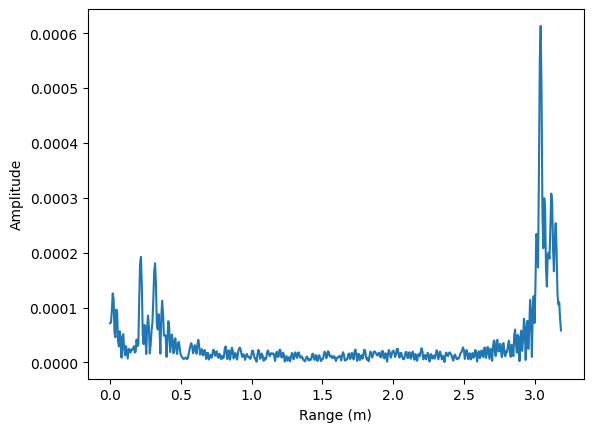

In [31]:
rp = np.fft.ifft(recData[:, 0, :], n=nfft, axis=1)
plt.plot(dist_vec, np.abs(rp[0]))
plt.xlabel("Range (m)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

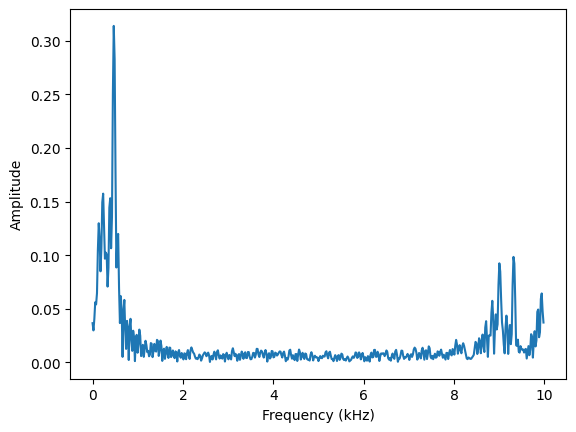

In [32]:
fft_first = np.fft.fft(recData[:, 0, :], n=nfft, axis=1)
freq_vec = np.arange(nfft) / nfft * rbw
plt.plot(freq_vec, np.abs(fft_first[0]))
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude")

Text(0.5, 1.0, 'Symmetrical Range Profile from FFT')

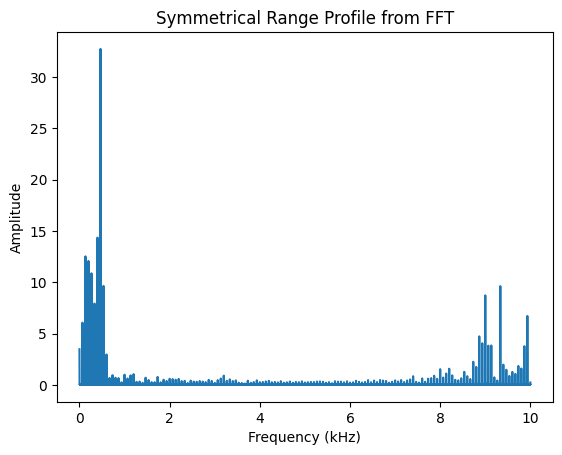

In [33]:
# fft_concat = np.zeros(15000)

concat_frames = np.concatenate([recData[i, 0, :] for i in range(recData.shape[0])])
fft_concat = np.abs(np.fft.fft(concat_frames))
# for txrx in range(400):
    # fft_concat += np.abs(np.fft.fft(concat_frames))

concat_freq_vec = np.arange(concat_frames.shape[0]) / concat_frames.shape[0] * rbw
plt.plot(concat_freq_vec, np.abs(fft_concat))
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude")
plt.title("Symmetrical Range Profile from FFT")

In [34]:
fft_concat_masked = np.zeros(fft_concat.shape)
fft_concat_masked[fft_concat.shape[0]//2:] = fft_concat[fft_concat.shape[0]//2:]
tv_concat_bin = np.argmax(np.abs(fft_concat_masked))
tv_concat_bin


14000

(0.0, 0.4)

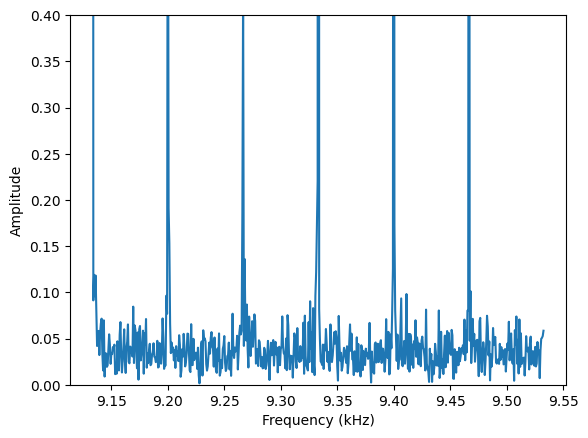

In [39]:
# start_freq = 0
# end_freq = 5000
# start_freq_index = np.argmax(concat_freq_vec * 1e3 >= start_freq)
# end_freq_index = np.argmax(concat_freq_vec * 1e3 >= end_freq)

width = 300
start_freq_index, end_freq_index = tv_concat_bin - width, tv_concat_bin + width
plt.plot(concat_freq_vec[start_freq_index:end_freq_index], np.abs(fft_concat[start_freq_index:end_freq_index]))
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude")
plt.ylim([0, 0.4])